In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
column_names = ["sepal.length", "sepal.width", "petal.length", "petal.width", "variety"]
df = pd.read_csv("D:\\Hoc may\\Bài thực hành 4\\iris.data",names = column_names)
df
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [14]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


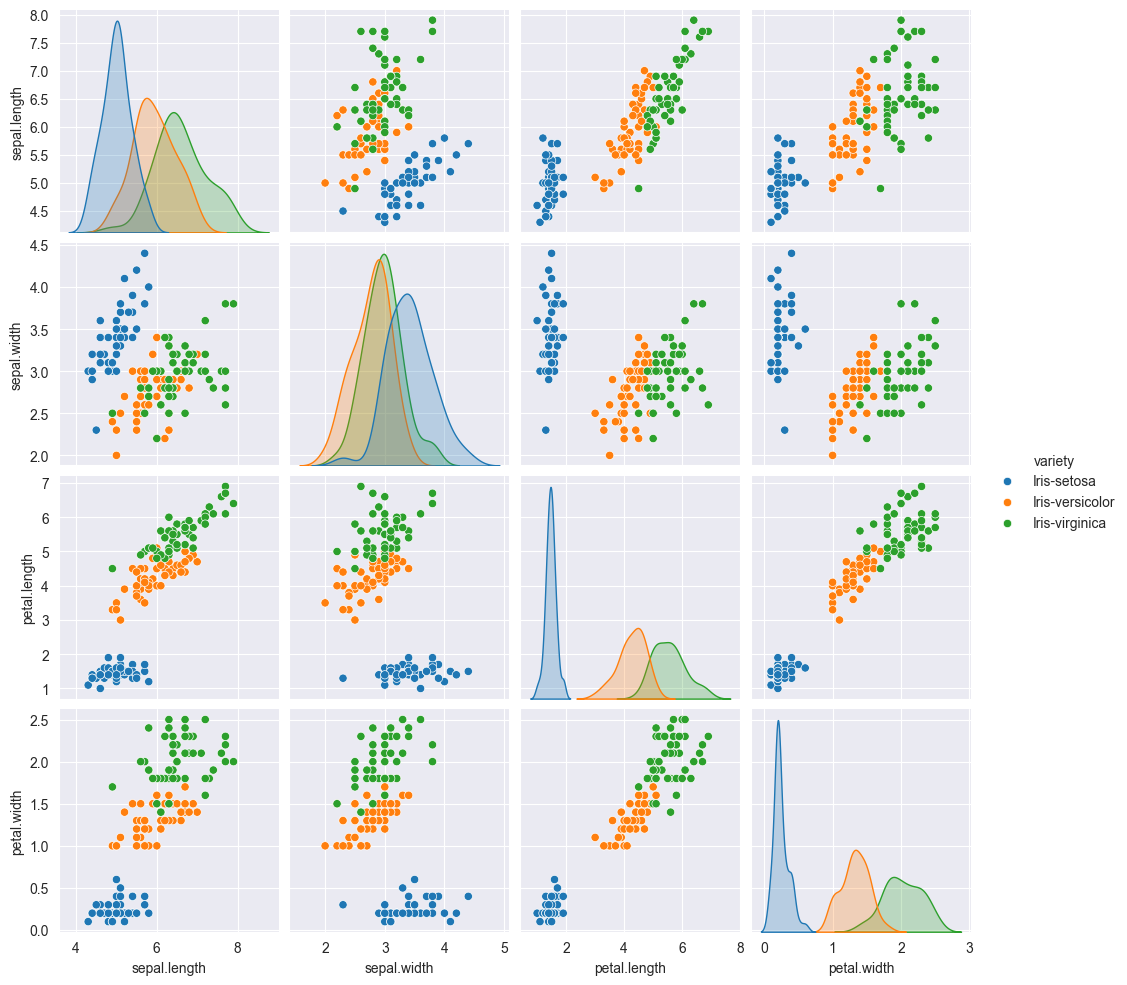

In [15]:
sns.pairplot(df, hue = 'variety')

Text(0.5, 1.0, 'Correlation matrix')

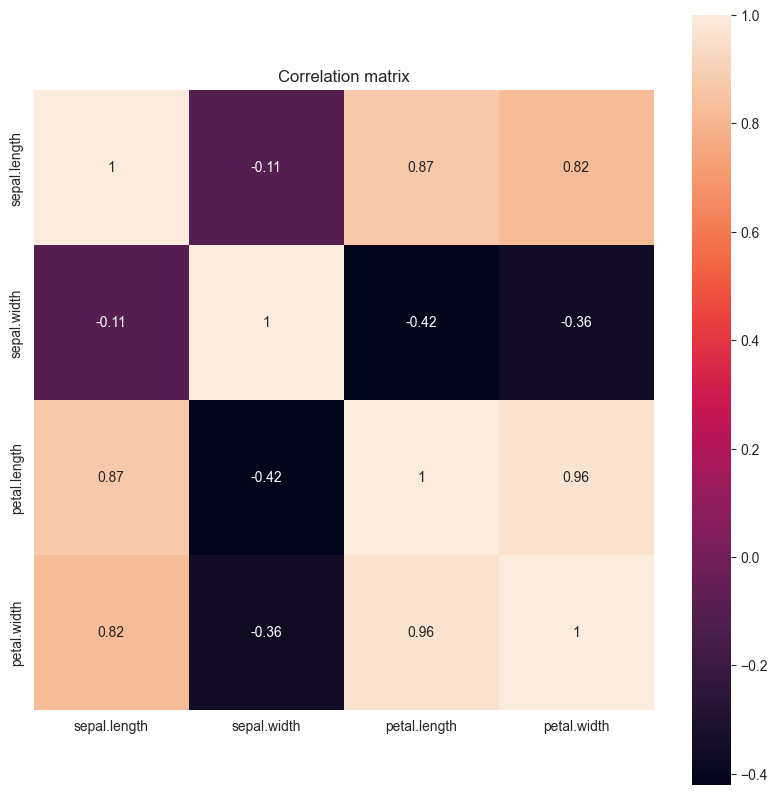

In [23]:
species = df["variety"].tolist()
X = df.drop("variety", axis=1)
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [24]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
# method2
np.linalg.eig(X_corr)

EigResult(eigenvalues=array([2.91081808, 0.92122093, 0.14735328, 0.02060771]), eigenvectors=array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

Text(0.5, 0, 'Dimensions')

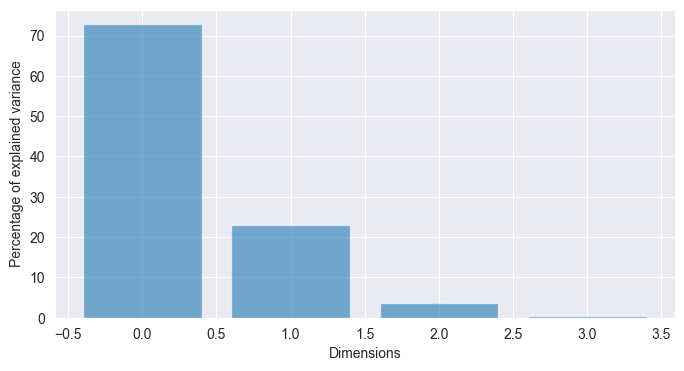

In [25]:
# plotting the variance explained by each PC
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [26]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

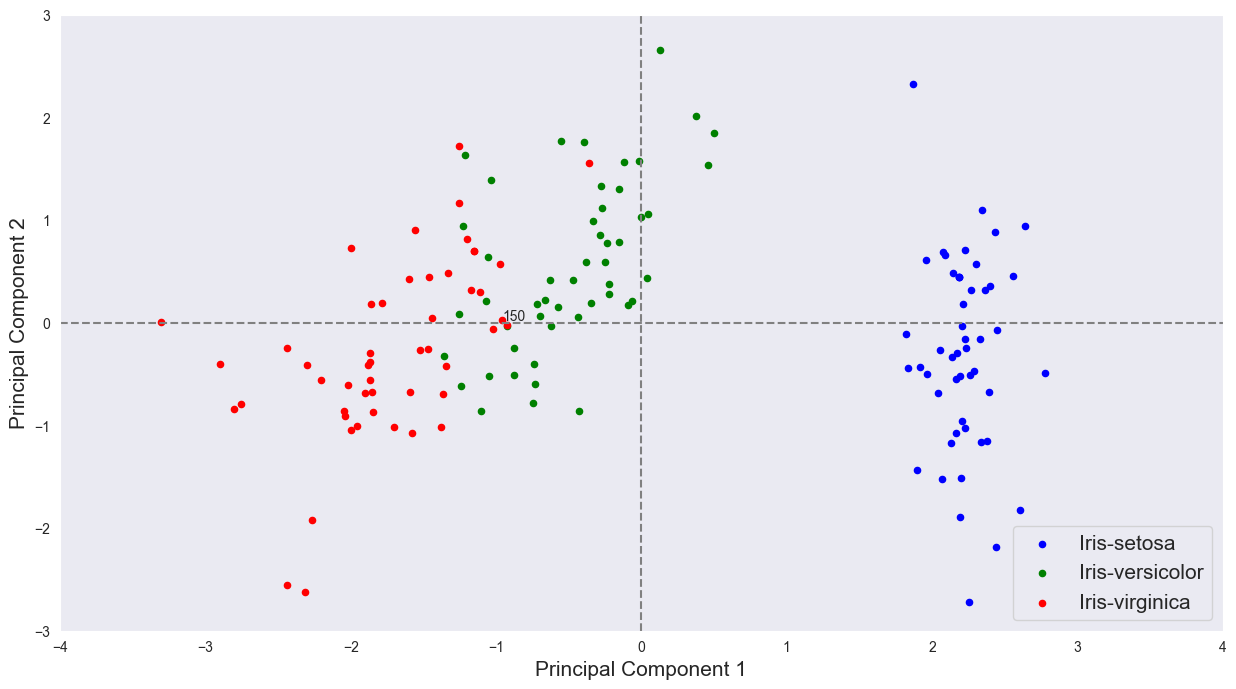

In [27]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
c=species_colors[species_unique.index(spec)])
    ax.annotate(str(i+1), (pc1[i],pc2[i]))
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
plot_scatter(pc1, pc2)